In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import datetime as dt
from pandas import DataFrame
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import figure

In [2]:
#importing .csv-file
df = pd.read_csv("TSLA.csv", sep=",")

In [3]:
#check
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [4]:
#check number of days in the dataset
close = df['Close'].values
print('Total number of days in the dataset: {}'.format(len(close)))

Total number of days in the dataset: 2845


In [5]:
#check
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [6]:
#converting from date format to ordinal number
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(dt.datetime.toordinal)

In [7]:
#check
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,733952,3.800,5.000,3.508,4.778,4.778,93831500
1,733953,5.158,6.084,4.660,4.766,4.766,85935500
2,733954,5.000,5.184,4.054,4.392,4.392,41094000
3,733955,4.600,4.620,3.742,3.840,3.840,25699000
4,733959,4.000,4.000,3.166,3.222,3.222,34334500


In [8]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2845 non-null   int64  
 1   Open       2845 non-null   float64
 2   High       2845 non-null   float64
 3   Low        2845 non-null   float64
 4   Close      2845 non-null   float64
 5   Adj Close  2845 non-null   float64
 6   Volume     2845 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 155.7 KB


In [9]:
# deleting all columns except the ones we are interested in
del df['Open']
del df['High']
del df['Low']
del df['Adj Close']
del df['Volume']

In [10]:
df.head()

,Date,Close
0,733952,4.778
1,733953,4.766
2,733954,4.392
3,733955,3.840
4,733959,3.222


In [11]:
X = df['Date'].values.reshape(-1, 1)
y = df['Close'].values

In [12]:
df.head()

,Date,Close
0,733952,4.778
1,733953,4.766
2,733954,4.392
3,733955,3.840
4,733959,3.222


In [13]:
#Creating a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# standardizing data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [15]:
# Linear regression
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_train)  # make predictions

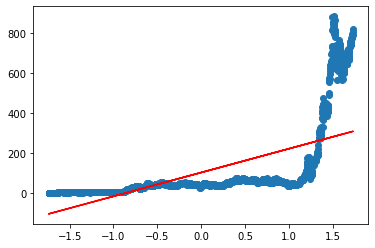

MSE = 20799.3126716639


In [16]:
# plotting
plt.scatter(X_train, y_train)
plt.plot(X_train, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred)))

In [17]:
#we need to remove the first 80%-ish of the data to get a more accurate prediction
df2 = df.drop(df.index[range(0, 2300)])

<AxesSubplot:xlabel='Date', ylabel='Close'>

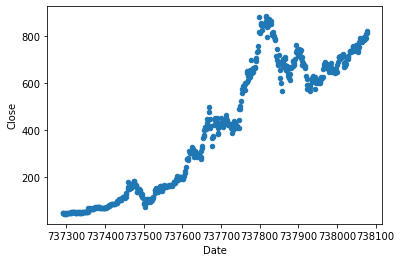

In [18]:
# plotting after data removal
df2.plot.scatter(x = 'Date', y = 'Close')

In [19]:
X = df2['Date'].values.reshape(-1, 1)
y = df2['Close'].values

In [20]:
#Creating a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
# standardizing data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [22]:
# Linear regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
Y_pred = linear_regressor.predict(X_train)

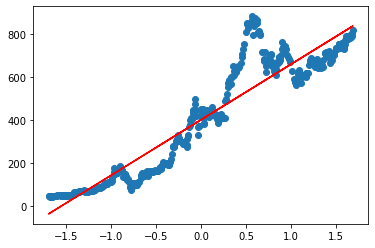

MSE = 9077.004713069698


In [23]:
# plotting
plt.scatter(X_train, y_train)
plt.plot(X_train, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred)))

In [24]:
#converts inserted date into an ordinal number. Input-format: 'YYYY-MM-DD'
def convertDate(date):
    date = pd.to_datetime(date)
    newdate = date.toordinal()
    return newdate

In [25]:
#a method standardizing the date
def standardizeData(date):
    stDate=pd.DataFrame([[date]])
    stDate=scaler.transform(stDate)
    return stDate

In [26]:
# method predicting TSLA stock price at a given date
def prediction(date):
    convertedDate = convertDate(date)
    standardizedDate = standardizeData(convertedDate)
    prediction = linear_regressor.predict(standardizedDate)
    print(f'The predicted price on {date} is {float(prediction)} NOK')

In [27]:
prediction("2021-10-22")

The predicted price on 2021-10-22 is 846.4242154304386 NOK
